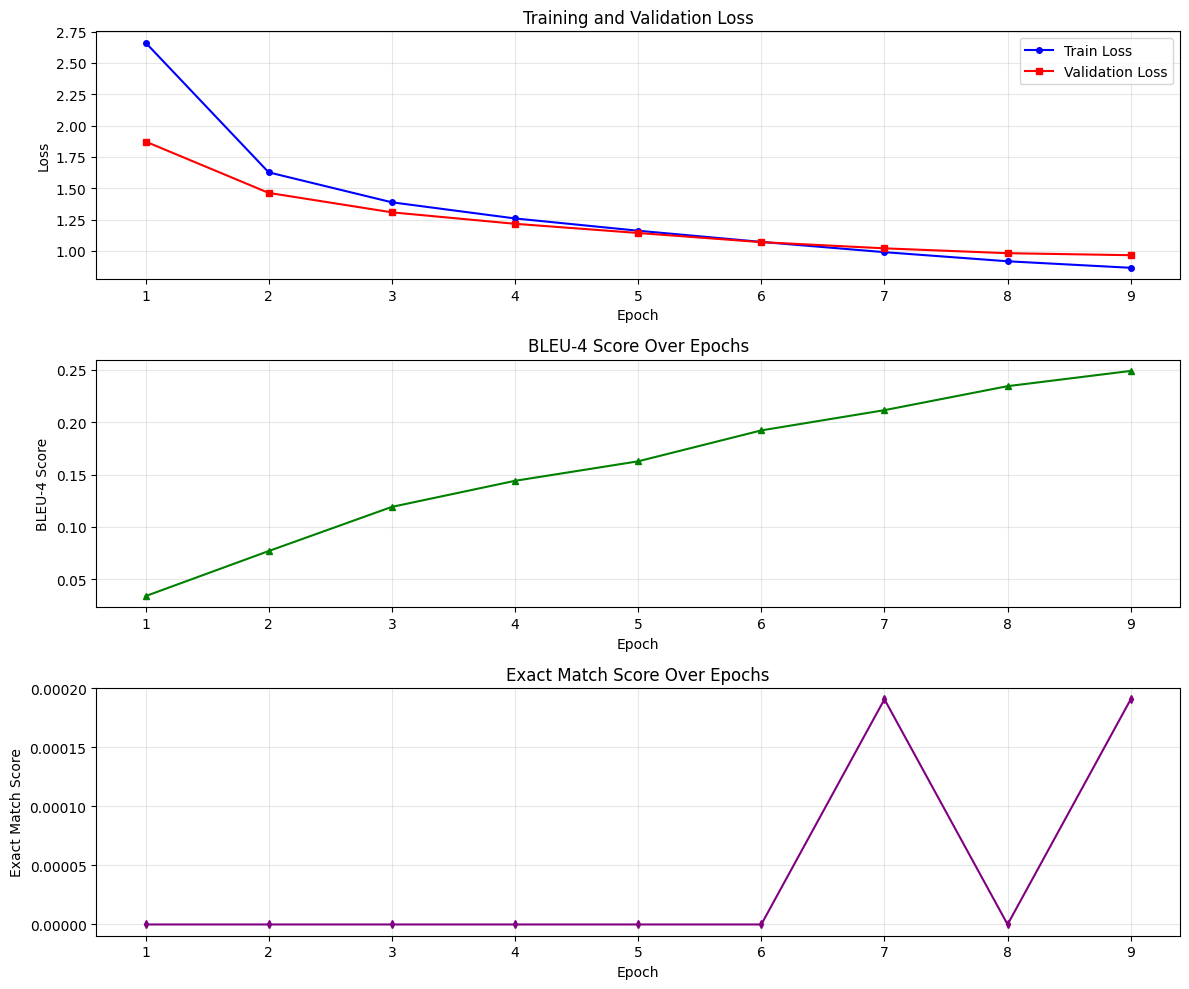

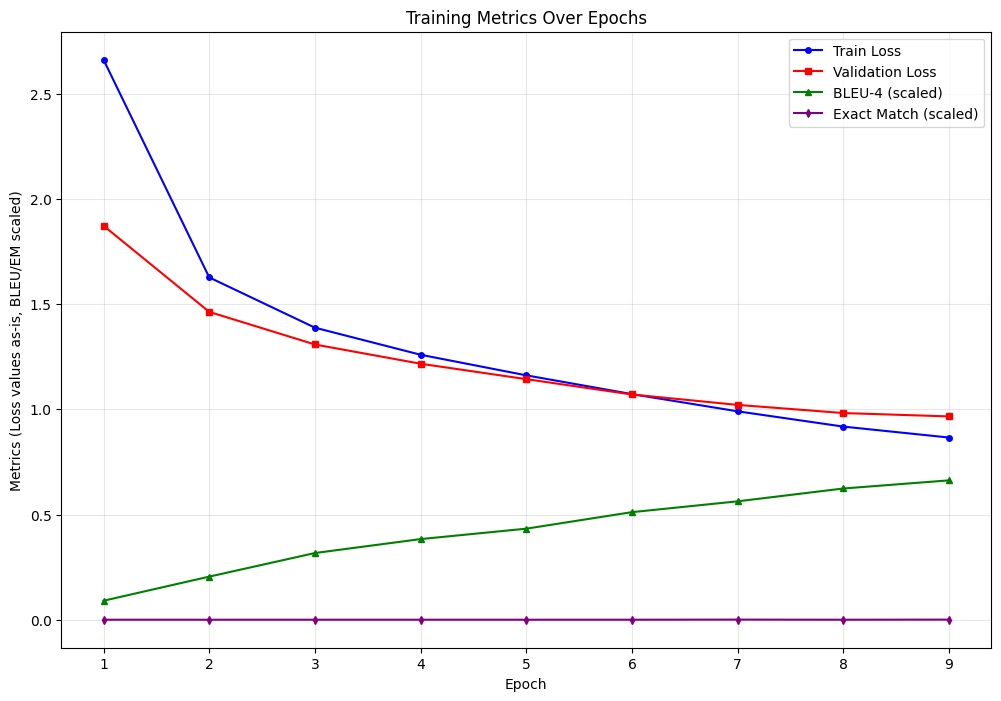

In [13]:

import matplotlib.pyplot as plt
import json


data_lines = [
    '{"epoch": 1, "train_loss": 2.6621496479251343, "val_loss": 1.8728977827037252, "bleu4": 0.033933129344847344, "em": 0.0}',
    '{"epoch": 2, "train_loss": 1.6272571585059648, "val_loss": 1.4634077203709905, "bleu4": 0.07696083292591704, "em": 0.0}',
    '{"epoch": 3, "train_loss": 1.3883714750108296, "val_loss": 1.308406444947894, "bleu4": 0.11909970106879214, "em": 0.0}',
    '{"epoch": 4, "train_loss": 1.2596354399122107, "val_loss": 1.2169602467882923, "bleu4": 0.14398881940540445, "em": 0.0}',
    '{"epoch": 5, "train_loss": 1.1617501934997807, "val_loss": 1.1436422138315876, "bleu4": 0.16259838286817582, "em": 0.0}',
    '{"epoch": 6, "train_loss": 1.0724895260776839, "val_loss": 1.070681407684233, "bleu4": 0.19210190835994967, "em": 0.0}',
    '{"epoch": 7, "train_loss": 0.9906920538375388, "val_loss": 1.021242374872289, "bleu4": 0.21142405078717405, "em": 0.00019054878048780488}',
    '{"epoch": 8, "train_loss": 0.9180700713580582, "val_loss": 0.9824612684002737, "bleu4": 0.23432844227305008, "em": 0.0}',
    '{"epoch": 9, "train_loss": 0.8660474952465753, "val_loss": 0.9665183112388704, "bleu4": 0.24887042765297282, "em": 0.00019054878048780488}'
]


data = [json.loads(line) for line in data_lines]


epochs = [entry['epoch'] for entry in data]
train_losses = [entry['train_loss'] for entry in data]
val_losses = [entry['val_loss'] for entry in data]
bleu4_scores = [entry['bleu4'] for entry in data]
em_scores = [entry['em'] for entry in data]


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))


ax1.plot(epochs, train_losses, 'b-', label='Train Loss', marker='o', markersize=4)
ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', marker='s', markersize=4)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2.plot(epochs, bleu4_scores, 'g-', label='BLEU-4', marker='^', markersize=4)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('BLEU-4 Score')
ax2.set_title('BLEU-4 Score Over Epochs')
ax2.grid(True, alpha=0.3)


ax3.plot(epochs, em_scores, 'purple', label='Exact Match', marker='d', markersize=4)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Exact Match Score')
ax3.set_title('Exact Match Score Over Epochs')
ax3.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))


plt.plot(epochs, train_losses, 'b-', label='Train Loss', marker='o', markersize=4)
plt.plot(epochs, val_losses, 'r-', label='Validation Loss', marker='s', markersize=4)
plt.plot(epochs, [score * max(train_losses) for score in bleu4_scores], 'g-', 
         label='BLEU-4 (scaled)', marker='^', markersize=4)
plt.plot(epochs, [score * max(train_losses) for score in em_scores], 'purple', 
         label='Exact Match (scaled)', marker='d', markersize=4)

plt.xlabel('Epoch')
plt.ylabel('Metrics (Loss values as-is, BLEU/EM scaled)')
plt.title('Training Metrics Over Epochs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Pozitivni znaci u rezultatima obučavanja
##  1. Poboljšanje u gubitku i BLEU-4 metrikama
Model pokazuje stabilan i konzistentan napredak tokom svih epoha. Vrednost gubitka na obučavajućem skupu (train loss) se smanjila sa 2.66 na 0,87, što predstavlja pad od 69%. Istovremeno, BLEU-4 skor je porastao sa skromnih 0,034 na solidnijih 0,249, što je poboljšanje od preko 7 puta. Ova poboljsanja ukazuju da model uspesno i efikasno uci.

## 2. Stabilno obučavanje bez katastrofalnih grešaka
Tokom celog procesa obučavanja nije došlo do naglih skokova u metrikama ili kolapsa modela. Sve promene su graduirane i predvidive, što je karakteristika dobro podesenog procesa obučavanja. Ova stabilnost je posebno važna jer omogućava pouzdano praćenje napretka i donošenje odluka o produžetku obučavanja.

## 3. Razumna konvergencija u primarnoj seriji obučavanja
Nakon početne faze prilagođavanja, model pokazuje zdrave obrasce konvergencije. Brzina poboljšanja se postepeno usporava, što je očekivano ponašanje kako model prilazi optimalnim performansama. Ovo sugerira da je proces učenja dobro balansiran i da model nije zapao u lokalne minimume.

# Zabrinjavajući aspekti koji zahtevaju pažnju
## 1. Izuzetno nizak skor tačnog poklapanja (EM)
Exact Match skor je tokom cele obuke ostao na gotovo nultim vrednostima (samo 0,00019 u epohama 7 i 9). Ovo ukazuje da model, iako uspeva da generiše semantički slične odgovore (što pokazuje BLEU-4), ne može da proizvede sintaksički potpuno ispravne i tačne rezultate.

## 2. Sve veći jaz između obučavajućeg i validacionog gubitka
Razlika između train i validation loss se postepeno povećava tokom epoha. U početnim epohama ova razlika je bila minimalna, ali do 9. epohe postaje primetna. Ovo je klasičan znak preprilagođavanja (overfitting) - model počinje da "nauči napamet" obučavajuće podatke umesto da generalizuje znanje. Ako se ovaj trend nastavi, performance na novim, neviđenim podacima će se pogoršati.

## 3. Nizak BLEU-4 skor
I ako je poboljsanje bleu-4 skorova preko epoha odlicno , najveci blue-4 skor je 0,25, sto je manje od standarda za dobar model (0,3). Ali, pri svakoj epohi se blue-4 skor stabilno povecava tako da je vrlo verovatno da bi se sa duzim treniranjem pristojno povecao blue-4 skor.

=== STATISTIKA DUZINA FORMULA ===
Ukupno formula: 47549
Prosečna dužina: 104.93
Min dužina: 1
Max dužina: 162
Medijana: 105.0


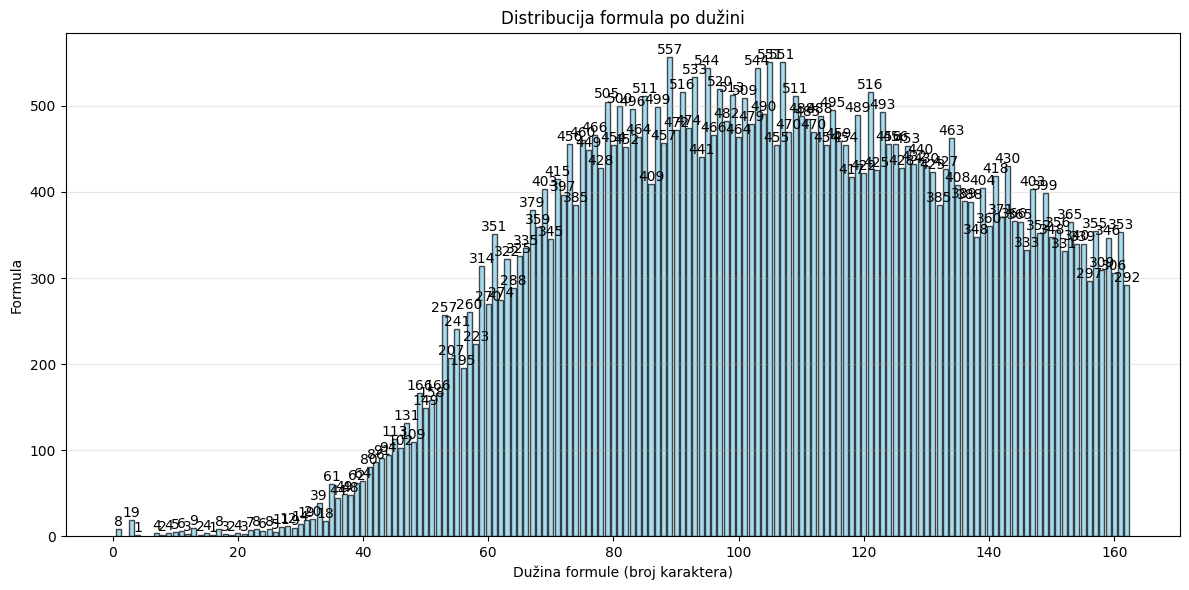

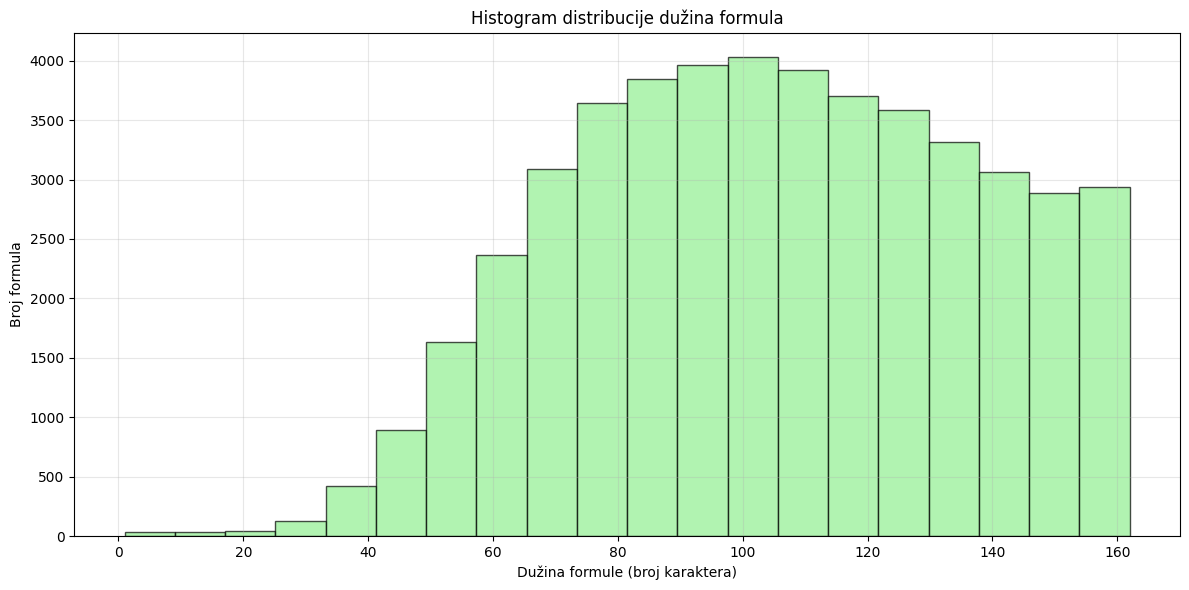


=== GRUPISANJE PO DUZINI ===
grupa_duzina
0-10         43
11-20        42
21-50      1628
51-100    19857
100+      25979
Name: count, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('im2latex_train.csv')

df['duzina_formule'] = df['formula'].astype(str).str.len()

print("=== STATISTIKA DUZINA FORMULA ===")
print(f"Ukupno formula: {len(df)}")
print(f"Prosečna dužina: {df['duzina_formule'].mean():.2f}")
print(f"Min dužina: {df['duzina_formule'].min()}")
print(f"Max dužina: {df['duzina_formule'].max()}")
print(f"Medijana: {df['duzina_formule'].median()}")

plt.figure(figsize=(12, 6))

# Grupisi po dužini i prebroj
duzina_counts = df['duzina_formule'].value_counts().sort_index()

plt.bar(duzina_counts.index, duzina_counts.values, 
        color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Formula')
plt.title('Distribucija formula po dužini')
plt.grid(True, alpha=0.3, axis='y')

# Dodaj brojeve iznad barova
for i, v in enumerate(duzina_counts.values):
    plt.text(duzina_counts.index[i], v + 0.1, str(v), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 3. HISTOGRAM duzina formula
plt.figure(figsize=(12, 6))

plt.hist(df['duzina_formule'], bins=20, color='lightgreen', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Broj formula')
plt.title('Histogram distribucije dužina formula')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statisticki pregled po grupama duzina
print(f"\n=== GRUPISANJE PO DUZINI ===")
bins = [0, 10, 20, 50, 100, df['duzina_formule'].max()]
labels = ['0-10', '11-20', '21-50', '51-100', '100+']
df['grupa_duzina'] = pd.cut(df['duzina_formule'], bins=bins, labels=labels)

grupa_counts = df['grupa_duzina'].value_counts().sort_index()
print(grupa_counts)

=== STATISTIKA DUZINA FORMULA ===
Ukupno formula: 5950
Prosečna dužina: 104.51
Min dužina: 3
Max dužina: 162
Medijana: 105.0


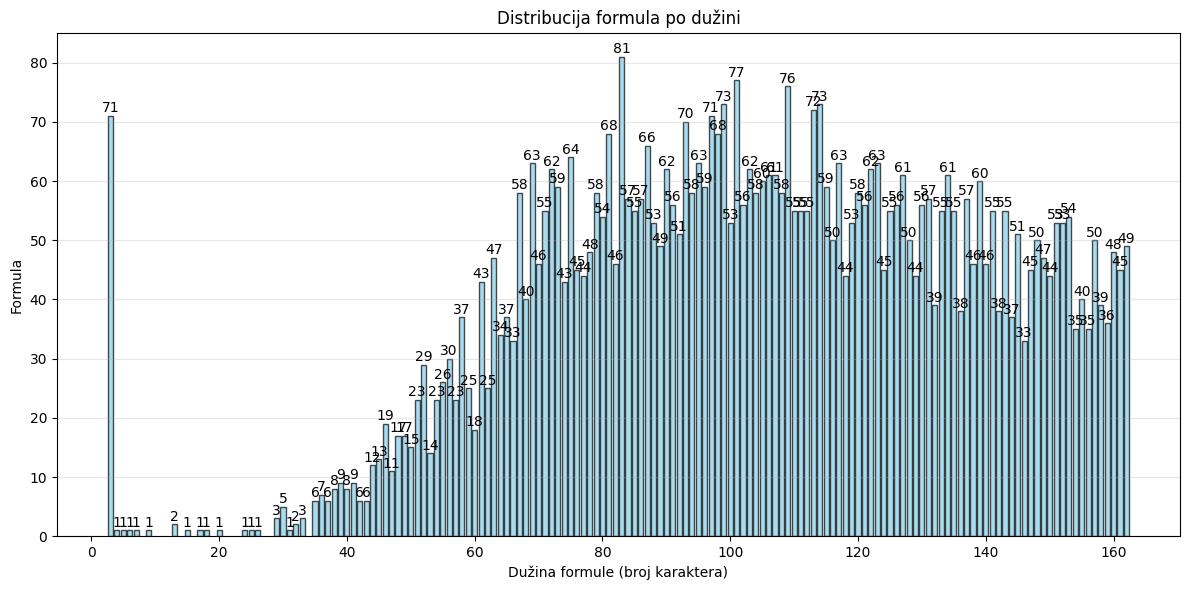

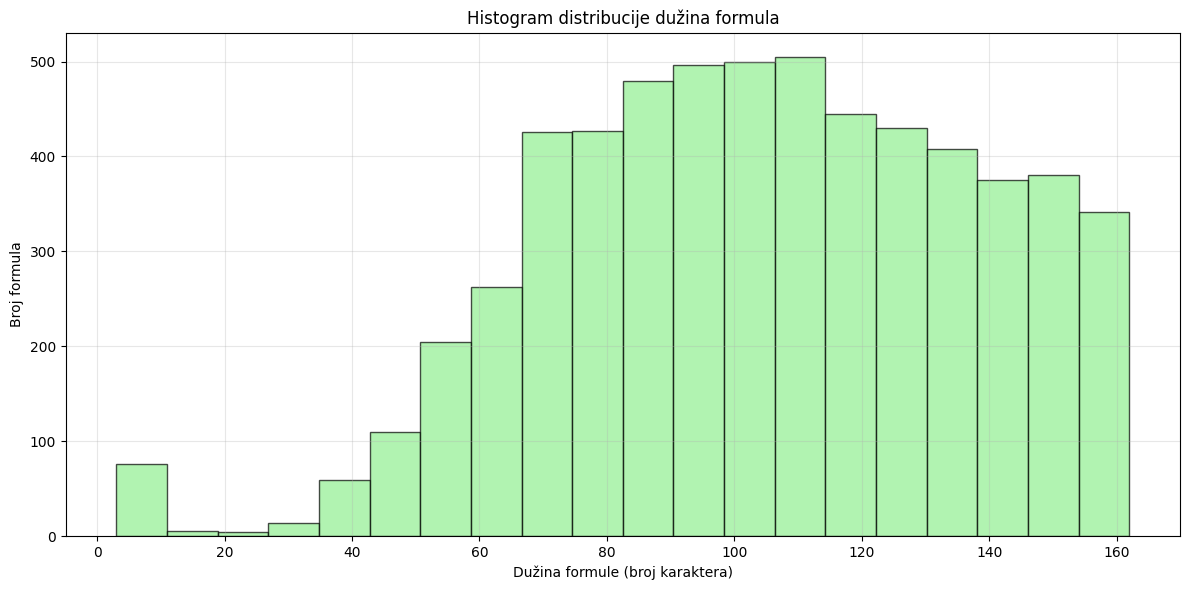


=== GRUPISANJE PO DUZINI ===
grupa_duzina
0-10        76
11-20        6
21-50      186
51-100    2422
100+      3260
Name: count, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('im2latex_test.csv')

df['duzina_formule'] = df['formula'].astype(str).str.len()

print("=== STATISTIKA DUZINA FORMULA ===")
print(f"Ukupno formula: {len(df)}")
print(f"Prosečna dužina: {df['duzina_formule'].mean():.2f}")
print(f"Min dužina: {df['duzina_formule'].min()}")
print(f"Max dužina: {df['duzina_formule'].max()}")
print(f"Medijana: {df['duzina_formule'].median()}")

plt.figure(figsize=(12, 6))

# Grupisi po dužini i prebroj
duzina_counts = df['duzina_formule'].value_counts().sort_index()

plt.bar(duzina_counts.index, duzina_counts.values, 
        color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Formula')
plt.title('Distribucija formula po dužini')
plt.grid(True, alpha=0.3, axis='y')

# Dodaj brojeve iznad barova
for i, v in enumerate(duzina_counts.values):
    plt.text(duzina_counts.index[i], v + 0.1, str(v), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 3. HISTOGRAM duzina formula
plt.figure(figsize=(12, 6))

plt.hist(df['duzina_formule'], bins=20, color='lightgreen', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Broj formula')
plt.title('Histogram distribucije dužina formula')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statisticki pregled po grupama duzina
print(f"\n=== GRUPISANJE PO DUZINI ===")
bins = [0, 10, 20, 50, 100, df['duzina_formule'].max()]
labels = ['0-10', '11-20', '21-50', '51-100', '100+']
df['grupa_duzina'] = pd.cut(df['duzina_formule'], bins=bins, labels=labels)

grupa_counts = df['grupa_duzina'].value_counts().sort_index()
print(grupa_counts)

=== STATISTIKA DUZINA FORMULA ===
Ukupno formula: 5236
Prosečna dužina: 104.40
Min dužina: 8
Max dužina: 162
Medijana: 104.0


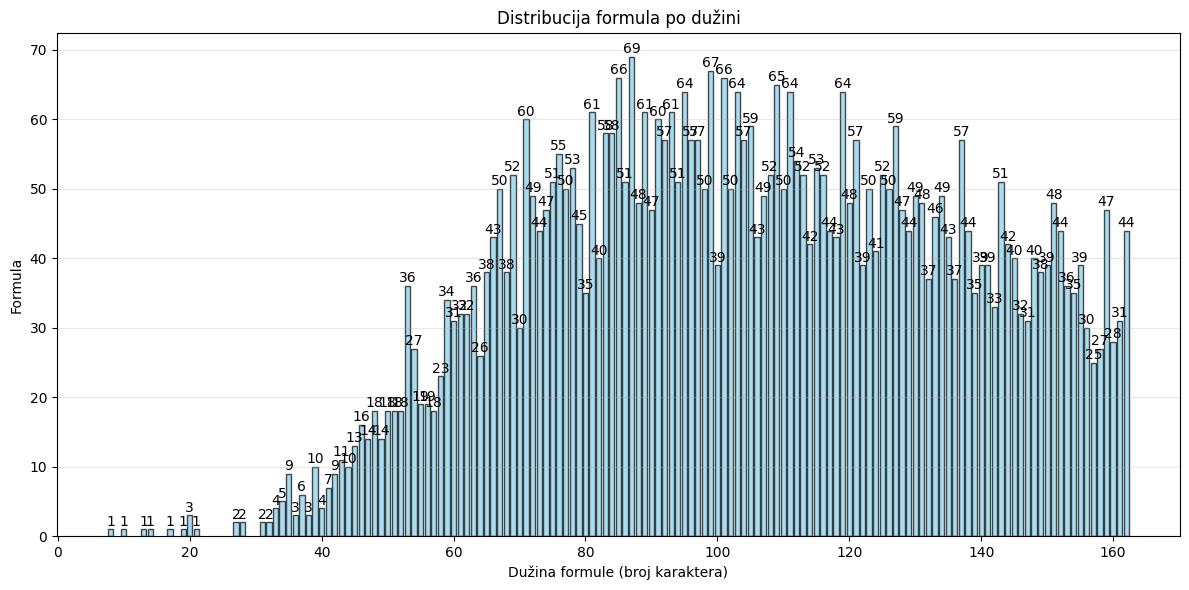

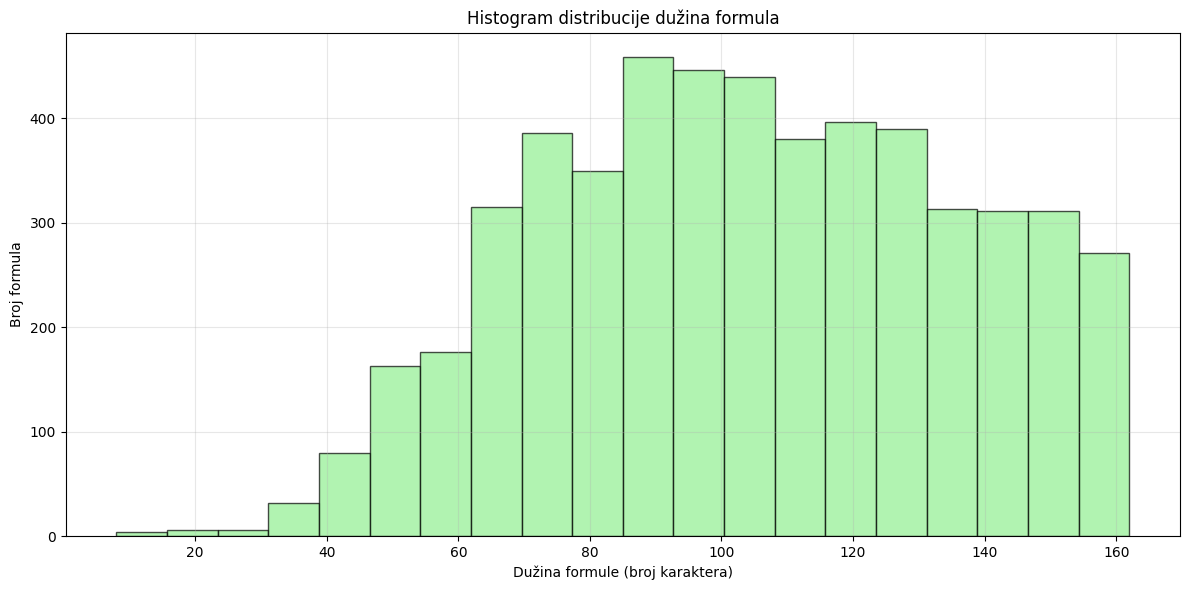


=== GRUPISANJE PO DUZINI ===
grupa_duzina
0-10         2
11-20        7
21-50      183
51-100    2231
100+      2813
Name: count, dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('im2latex_validate.csv')

df['duzina_formule'] = df['formula'].astype(str).str.len()

print("=== STATISTIKA DUZINA FORMULA ===")
print(f"Ukupno formula: {len(df)}")
print(f"Prosečna dužina: {df['duzina_formule'].mean():.2f}")
print(f"Min dužina: {df['duzina_formule'].min()}")
print(f"Max dužina: {df['duzina_formule'].max()}")
print(f"Medijana: {df['duzina_formule'].median()}")

plt.figure(figsize=(12, 6))

# Grupisi po dužini i prebroj
duzina_counts = df['duzina_formule'].value_counts().sort_index()

plt.bar(duzina_counts.index, duzina_counts.values, 
        color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Formula')
plt.title('Distribucija formula po dužini')
plt.grid(True, alpha=0.3, axis='y')

# Dodaj brojeve iznad barova
for i, v in enumerate(duzina_counts.values):
    plt.text(duzina_counts.index[i], v + 0.1, str(v), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 3. HISTOGRAM duzina formula
plt.figure(figsize=(12, 6))

plt.hist(df['duzina_formule'], bins=20, color='lightgreen', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Broj formula')
plt.title('Histogram distribucije dužina formula')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statisticki pregled po grupama duzina
print(f"\n=== GRUPISANJE PO DUZINI ===")
bins = [0, 10, 20, 50, 100, df['duzina_formule'].max()]
labels = ['0-10', '11-20', '21-50', '51-100', '100+']
df['grupa_duzina'] = pd.cut(df['duzina_formule'], bins=bins, labels=labels)

grupa_counts = df['grupa_duzina'].value_counts().sort_index()
print(grupa_counts)